In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.utils import shuffle

### Load the dataset from the file Ecommerce.csv

In [2]:
df = pd.read_csv("Ecommerce.csv")
df.head(7)

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611Jeffreychester, MN 672...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692Josephbury, WV 922...",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175


```
This dataset includes the following data for 200 online customers:

- Email
- Adress
- Avatar
- Avg Session Length (everage time they spent on usage)
- Time on App (time they spent using the application)
- Time on Website (time they spent using the website)
- Length of Membership (for how long they have been a user)
- Yearly Amount Spent (how much money they spend yearly)

Yout goal will be to estimate the value of the Yearly Amount Spent using the feature(s) of the users
```

### Get rid of non-numerical columns of the dataset

In [3]:
df = pd.get_dummies(df)
df.head()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Email_aaron04@yahoo.com,Email_aaron11@luna.com,Email_aaron22@gmail.com,Email_aaron89@gmail.com,Email_acampbell@sanchez-velasquez.info,...,Avatar_Teal,Avatar_Thistle,Avatar_Tomato,Avatar_Turquoise,Avatar_Violet,Avatar_Wheat,Avatar_White,Avatar_WhiteSmoke,Avatar_Yellow,Avatar_YellowGreen
0,34.497268,12.655651,39.577668,4.082621,587.951054,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,31.926272,11.109461,37.268959,2.664034,392.204933,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33.000915,11.330278,37.110597,4.104543,487.547505,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,34.305557,13.717514,36.721283,3.120179,581.852344,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33.330673,12.795189,37.536653,4.446308,599.406092,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Use Yearly Amount Spent as your target variable. Plot the relationship of each of the numerical features with the target variable

In [4]:
target = df["Yearly Amount Spent"]
df = df.drop(["Yearly Amount Spent"], axis=1)
target.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

Text(510.4494949494949, 0.5, 'Yearly Amount Spent')

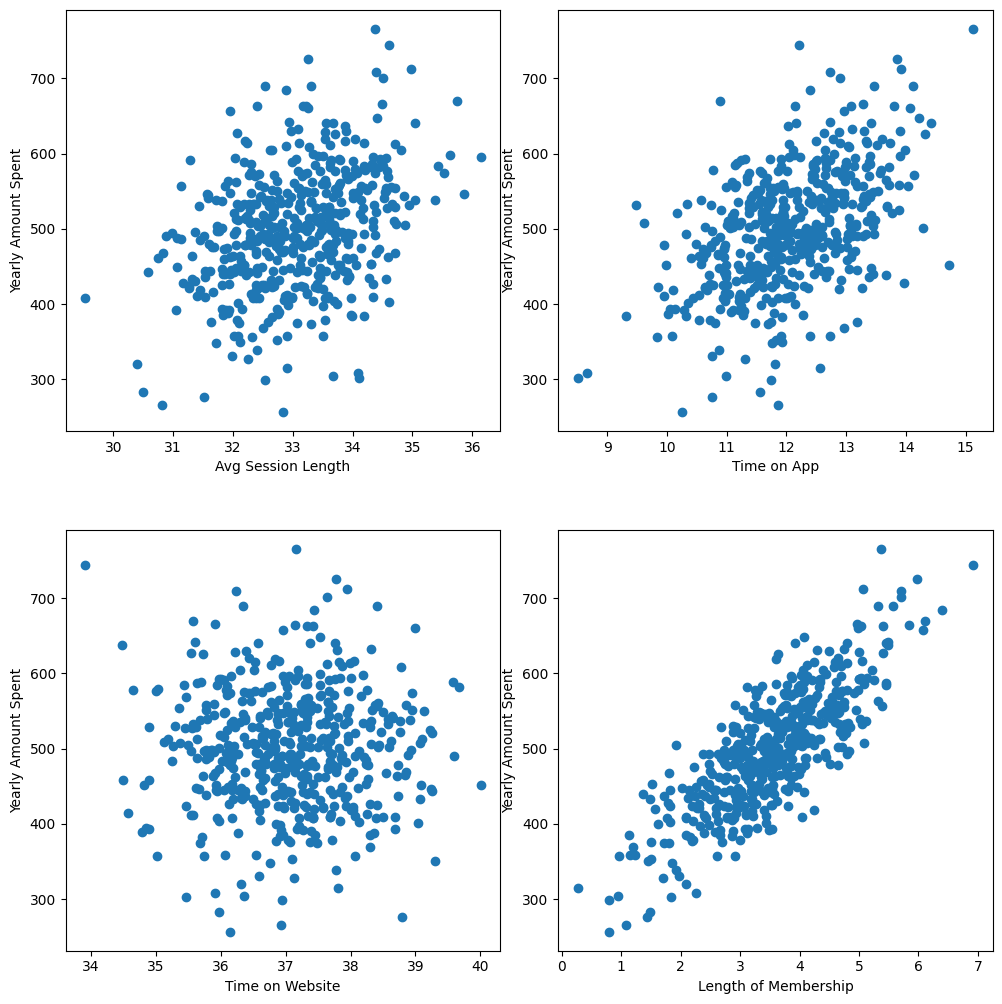

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
fig.tight_layout(h_pad = 5)

ax[0][0].scatter(df["Avg Session Length"], target)
ax[0][0].set_xlabel("Avg Session Length")
ax[0][0].set_ylabel("Yearly Amount Spent")

ax[0][1].scatter(df["Time on App"], target)
ax[0][1].set_xlabel("Time on App")
ax[0][1].set_ylabel("Yearly Amount Spent")

ax[1][0].scatter(df["Time on Website"], target)
ax[1][0].set_xlabel("Time on Website")
ax[1][0].set_ylabel("Yearly Amount Spent")

ax[1][1].scatter(df["Length of Membership"], target)
ax[1][1].set_xlabel("Length of Membership")
ax[1][1].set_ylabel("Yearly Amount Spent")


### Leave only one feature that has a linear relationship with the target variable.

In [6]:
one_linear_feature_df = df["Length of Membership"]

### Divide the dataset into training and test sets with the ratio 80:20.

In [7]:
def append_ones(np_matrix):
    ones = np.ones(np_matrix.shape[0])[:, np.newaxis]

    if len(np_matrix.shape) == 1:
        np_matrix = np.array(np_matrix)[:, np.newaxis]
    np_matrix = np.concatenate([ones, np_matrix], axis=1)
    return np_matrix

def append_ones_to_df(pd_df):
    pd_df.insert(0, "Ones", np.ones(pd_df.shape[0]), True)

In [8]:
y = target.copy()
one_linear_feature_df = append_ones(one_linear_feature_df)
one_linear_feature_df, y = shuffle(one_linear_feature_df, y, random_state=78)
X_train, X_test, y_train, y_test = train_test_split(one_linear_feature_df, y, test_size=0.2, random_state=78)

### Use the resulting train and test sets with the next 2 functions to fit linear regression and plot the resulting regression line.

The first function is `fit_1d_linear_regression` that takes two vectors $x$ and $y$, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope.

# Closed form solution $\beta = (X^T*X)^{-1}*X^T*y$

In [9]:
def fit_1d_linear_regression(data_vector, response_vector):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """


    # TODO: PSEUDINVERSE is np.pinv
    if len(data_vector.shape) == 1:
        data_vector = append_ones(data_vector)
    return np.linalg.inv(data_vector.T.dot(data_vector)).dot(data_vector.T).dot(response_vector)

The second function is `plot_line` function, that takes $\beta_0, \beta_1, x, y$ and plots a scatter plot of the data, and the line $y = \beta_0 + \beta_1 x$. And saves the plot in `YOURNAME.png`

In [10]:
def plot_fitted_line(b0: float,
                     b1: float,
                     x,
                     y):
    """
    :param b0: Intercept of line to plot
    Note: avoid this if you don't have an intercept in the previous function
    :param b1: Slope of the line to plot
    :param x: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x coordinates)
    :param y: A pandas series object (i.e. a column of a dataframe),
                        where each element is a label (y coordinates)
    """

    if len(x.shape) == 1:
        x = append_ones(x)

    fig, ax = plt.subplots(figsize=(7, 7))
    fig.tight_layout(h_pad=4)

    ax.scatter(x[:, 1], y, c="cyan")
    ax.set_xlabel("Data")
    ax.set_ylabel("Target")

    ax.plot(x[:, 1], np.array(x).dot([b0, b1]), c="magenta", linewidth=4)

    fig.savefig("Sona_Hasratyan.png")

### Plot example

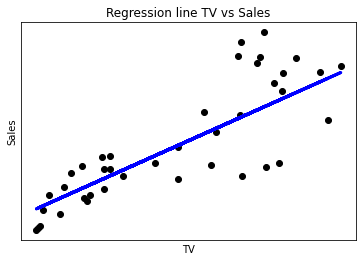

### Now fit the linear regression to the data containing only 1 feature using sklearn and compare the results with your own fit_1d_linear_regression function

[276.43832757  62.96695685]
276.4383275689578 62.966956852343785


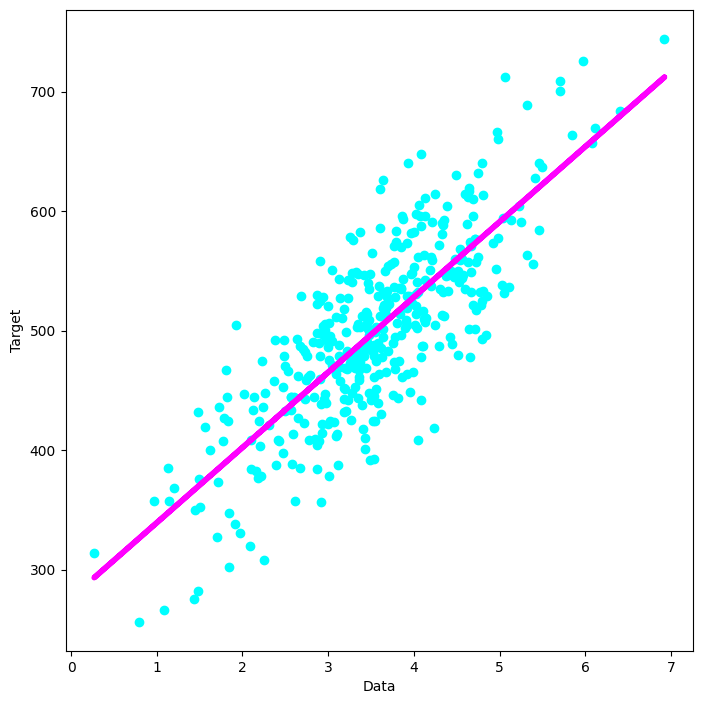

In [11]:
coefficients = fit_1d_linear_regression(X_train, y_train)
print(coefficients)

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
print(lr.intercept_, lr.coef_[1])

plot_fitted_line(*coefficients, X_train, y_train)
# plot_fitted_line(*coefficients, X_test, y_test)

### Use sklearn.metrics to calculate Mean absolute error, Mean squared error, Root mean squared error and R-squared for the results of your own function vs the sklearn regression results. Try to interpret your results.

In [12]:
def predict_1d_linear_regression(X, weights: np.ndarray):
    if len(X.shape) == 1:
        X = append_ones(X)
    return X.dot(weights)

In [13]:
y_pred = predict_1d_linear_regression(X_test, coefficients)
sklearn_y_pred = lr.predict(X_test)
print(f"My MAE: {mean_absolute_error(y_test, y_pred): .2f}")
print(f"Sklearn's MAE: {mean_absolute_error(y_test, sklearn_y_pred): .2f}\n")

my_mse = mean_squared_error(y_test, y_pred)
sklearn_mse = mean_squared_error(y_test, sklearn_y_pred)
print(f"My MSE: {my_mse: .2f}")
print(f"Sklearn's MSE: {sklearn_mse: .2f}\n")

print(f"My RMSE: {np.sqrt(my_mse): .2f}")
print(f"Sklearn's RMSE: {np.sqrt(sklearn_mse): .2f}\n")

print(f"My R-squared: {r2_score(y_test, y_pred): .2f}")
print(f"Sklearn's R-squared: {r2_score(y_test, sklearn_y_pred): .2f}")

My MAE:  36.29
Sklearn's MAE:  36.29

My MSE:  2124.01
Sklearn's MSE:  2124.01

My RMSE:  46.09
Sklearn's RMSE:  46.09

My R-squared:  0.70
Sklearn's R-squared:  0.70


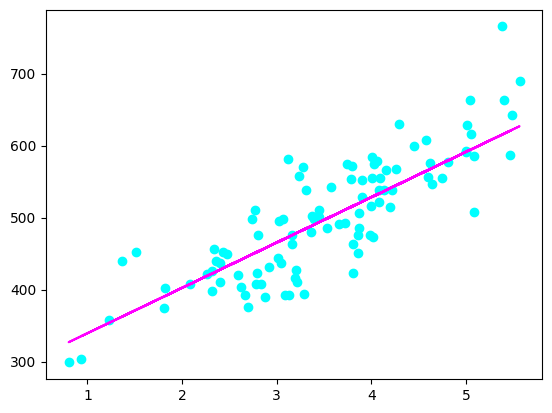

In [14]:
fig, ax = plt.subplots()
ax.scatter(X_test[:, 1], y_test, c="cyan")
ax.plot(X_test[:, 1], y_pred, c="magenta")

### Fit linear regression to the data containing all numerical features using sklearn and use the same metrics to evaluate how good the model is.

In [15]:
y_num = target.copy()
numerical_df = df[["Avg Session Length", "Time on Website", "Time on App", "Length of Membership"]]
numerical_df, y_num = shuffle(numerical_df, y_num, random_state=67)
numerical_df = append_ones(numerical_df)

X_train, X_test, y_train, y_test = train_test_split(numerical_df, y_num, test_size=0.2, random_state=67)

In [16]:
lr.fit(X_train, y_train)
print("Weights: ", lr.intercept_, lr.coef_)

y_pred = lr.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred): .2f}\n")

sklearn_mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {sklearn_mse: .2f}\n")

print(f"RMSE: {np.sqrt(sklearn_mse): .2f}\n")

print(f"R-squared: {r2_score(y_test, y_pred): .2f}")

Weights:  -1036.5380584647191 [ 0.00000000e+00  2.58658265e+01 -2.96026224e-02  3.86491759e+01
  6.12754888e+01]
MAE:  8.55

MSE:  115.31

RMSE:  10.74

R-squared:  0.98


### Implement K-fold Cross Validation

In [22]:
def _KFold(X, n_splits=10):
    train_test_folds = []

    indices = np.arange(len(X))
    indices_folds = np.split(indices, n_splits)
    for i in range(n_splits):
        train_test_folds.append((np.array([index for index in indices if not index in indices_folds[i]]), np.array(indices_folds[i])))
    return train_test_folds


### Evaluate model with K-fold

In [23]:
_y = target.to_numpy()
_df = df.to_numpy()
_df = append_ones(_df)
_df, _y = shuffle(_df, _y, random_state=13)

scores = []
lr = linear_model.LinearRegression()
cv = _KFold(_df, n_splits=10)
for train_index, test_index in cv:
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = _df[train_index], _df[test_index], _y[train_index], _y[test_index]
    lr.fit(X_train, y_train)
    scores.append(lr.score(X_test, y_test))

np.mean(scores)

ValueError: array split does not result in an equal division

In [19]:
from sklearn.model_selection import KFold
X = _df

scores = []
best_svr = linear_model.LinearRegression()
cv = KFold(n_splits=10)

for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = _df[train_index], _df[test_index], _y[train_index], _y[test_index]
    best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))

np.mean(scores)
# todo: try to reset indices for append_ones_to_df


# data.sample(frac=1).reset_index(drop=True) for resetting indices in the dataframe


0.9527058120882599

in test value columns can have some values that do not appear in the train, also the other case some are in train though not in test, remove them just then process, also do OHE for the test data, try ridge not to have -R score on test, whichever model we want